# **OLS의 헤도닉 모델 구현**

###### *김재석 오주헌 김성언 김민식 윤지환*



---



### **OLS (최소자승법, Ordinary Least Squares) 회귀란?**

![image](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/1024px-Linear_regression.svg.png)


*   OLS 기법은 오차의 제곱의 합을 최소화하는 기법으로, 추정하고자 하는 파라미터 β에 대한 표현식을 다음과 같이 구할 수 있다.


![image](https://wikimedia.org/api/rest_v1/media/math/render/svg/917759911692e98ba477c3d669356525a84aace6)


*   오차가 유한한 분산을 가지며, 오차가 독립 변수와 연관되어 있지 않다면, 추정은 편향되어있지 않고, 일관성 있다.

![image](https://wikimedia.org/api/rest_v1/media/math/render/svg/4fe630b8dd4a94034014b5574c04f48c623761d9)


*   가장 단순하고 많이 쓰이는 추정 방법이다.


*   OLS 추정은 일반적으로 실험이나 관측치에 적용하고자 할 때 사용한다





## ⅰ) 데이터 수집





1.   세종시 아파트 2020년 실거래가 데이터 (국토교통부 홈페이지)


2.   세종시 아파트 단지 기본 정보 크롤링 (네이버 부동산)


3.   세종시 아파트 단지 관리시설정보 크롤링 (공동주택관리정보시스템)


4.  NULL 값은 여러 사이트(일사편리:세종 부동산정보조회 시스템 등)를 참고하여 채움 

In [ ]:
# 2 세종시 아파트 단지 기본 정보 크롤링 코드

arr=naver_aptname

arr_len=len(arr)

sedaesu_list=[]
floor_list=[]
sayongdate_list=[]
parking_list=[]
yongjeok_list=[]
gunpae_list=[]
gunsulsa_list=[]
nanbang_list=[]

danji_info=[]


for i in range(arr_len):
    danji_info=[]
    driver.get('https://new.land.naver.com/')
    time.sleep(0.5)
    danjiname=arr[i]
    elem_search=driver.find_element_by_class_name('search_input')
    elem_search.clear()
    elem_search.send_keys(danjiname)
    elem_search.send_keys(Keys.RETURN)
    
    try:
        time.sleep(0.5)
        d1=driver.find_elements_by_class_name("title")
        ddf=[]
        
        for i2 in range(len(d1)):
            ddf.append(d1[i2].text)
            
        if arr[i] in ddf:
            driver.find_elements_by_class_name("title")[ddf.index(arr[i])].click()
            button=driver.find_element_by_class_name('complex_link').click()
            time.sleep(0.5)
            detail=driver.find_element_by_id('detailContents1')
            deep1=detail.find_elements_by_class_name('table_th')
            deep2=detail.find_elements_by_class_name('table_td')

            for i3 in range(len(deep1)):
                danji_info.append(deep1[i3].text)
                
                
            
            sedaesu_num=danji_info.index('세대수')
            floor_num=danji_info.index('저/최고층')
            sayongdate_num=danji_info.index('사용승인일')
            parking_num=danji_info.index('총주차대수')
            yongjeok_num=danji_info.index('용적률')
            gunpae_num=danji_info.index('건폐율')
            gunsulsa_num=danji_info.index('건설사')
            nanbang_num=danji_info.index('난방')

            
            
            sedaesu_list.append(deep2[sedaesu_num].text)
            floor_list.append(deep2[floor_num].text)
            sayongdate_list.append(deep2[sayongdate_num].text)
            parking_list.append(deep2[parking_num].text)
            yongjeok_list.append(deep2[yongjeok_num].text)
            gunpae_list.append(deep2[gunpae_num].text)
            gunsulsa_list.append(deep2[gunsulsa_num].text)
            nanbang_list.append(deep2[nanbang_num].text)
           
 
        else:
            time.sleep(0.5)                        
            sedaesu_list.append('정보검색안됨')
            floor_list.append('정보검색안됨')
            sayongdate_list.append('정보검색안됨')
            parking_list.append('정보검색안됨')
            yongjeok_list.append('정보검색안됨')
            gunpae_list.append('정보검색안됨')
            gunsulsa_list.append('정보검색안됨')
            nanbang_list.append('정보검색안됨')
    except:
        print('오류 발생')
        sedaesu_list.append('검색결과중복')
        floor_list.append('검색결과중복')
        sayongdate_list.append('검색결과중복')
        parking_list.append('검색결과중복')
        yongjeok_list.append('검색결과중복')
        gunpae_list.append('검색결과중복')
        gunsulsa_list.append('검색결과중복')
        nanbang_list.append('검색결과중복')
    
    cname=arr[i]
    nnum=len(arr)-arr.index(arr[i])-1
    print('{} 크롤링 성공, {}개 남음'.format(cname,nnum))

sejong_df=pd.DataFrame(arr)

sejong_df['세대수']=sedaesu_list
sejong_df['저/최고층']=floor_list
sejong_df['사용승인일']=sayongdate_list
sejong_df['총주차대수']=parking_list
sejong_df['용적률']=yongjeok_list
sejong_df['건폐율']=gunpae_list
sejong_df['건설사']=gunsulsa_list
sejong_df['난방']=nanbang_list

sejong_df

```r
# 3 세종시 아파트 단지 관리시설정보 크롤링 코드 (R 사용)
library(tidyverse)
library(httr)
library(rvest)
library(magrittr)
library(jsonlite)

month <- '202101'

area <- readRDS(file = 'area.RDS')
str(object = area)
head(x = area, n = 10L)

area <- area %>%
  filter(sido == '세종특별자치시') %>% 
  mutate (code = str_sub(string = code, start = 1, end = 8))

aptList <- data.frame()

for (i in 1:length(x = area$code)) {
  cat(' 현재', i, '번 째 법정동 데이터를 수집 중 입니다!')
  
  res <- POST(url = 'http://www.k-apt.go.kr/kaptinfo/getKaptList.do',
              body = list(bjd_code = area$code[i],
                          search_date = month),
              encode = 'form')
  tryCatch({
    json <- res %>%
      content (as = 'text', encoding = 'UTF-8') %>% 
      fromJSON()
    
    df <- json$resultList
    aptList <- rbind(aptList, df) 
    cat('\n')
  }, error = function(e) cat(' --> 아파트 단지 목록이 없습니다 !\n'))
  
  Sys.sleep(time = 10L)
  
}

saveRDS (object = aptList, file = 'aptList.RDS')

getAptInfo <- function(aptCode) {
  
  reqURL <- 'http://www.k-apt.go.kr/kaptinfo/getkaptInfo_detail.do'
  
  res <- POST(url = reqURL,
              body = list(kapt_code = aptCode),
              encode = 'form')
  
  json <- res %>%
    content (as = 'text', encoding = 'UTF-8') %>% 
    fromJSON()
  
  detl <- json$resultMap_kapt %>%
    plyr:: ldply(.fun = as.data.frame) %>% 
    t() %>% 
    as.data.frame() %>% 
    set_rownames(value = NULL) %>% 
    set_colnames (value = .[1, ]) %>% 
    slice(2)
  
  
  detl <- detl %>% select(KAPT_CODE,
                          CODE_SALE,
                          CODE_HEAT,
                          KAPT_TAREA,
                          KAPT_DONG_CNT,
                          CODE_APT,
                          CODE_HALL,
                          KAPT_USEDATE,
                          KAPT_MAREA,
                          KAPT_MGR_CNT,
                          KAPTD_SCNT,
                          KAPTD_CLCNT,
                          KAPTD_DCNT,
                          KAPTD_PCNT,
                          KAPTD_PCNTU,
                          KAPTD_CCCNT,
                          KAPTD_ECAPA,
                          KAPTD_ECNTP,
                          CODE_NET,
                          KAPTD_WTIMEBUS,
                          KAPTD_WTIMESUB)
  
  count <- json$resultMap_kapt_areacnt %>% 
    filter (KAPTDA_CNT != 'NA') %>% 
    mutate (KAPTDA_CNT - as.numeric(x - KAPTDA_CNT)) %>% 
    summarise(KAPTDA_TTL = sum(KAPTDA_CNT))
  
  if (nrow(x = count) == 0) { 
    count <- data.frame(KAPTDA_TTL = NA) 
  }
  
  jibun <- json$resultMap_kapt_addrList %>%
    filter (ADDR_GBN == 'B') %>% 
    slice(1) %>% 
    select(ADDR) %>% 
    rename(JB_ADDR = ADDR)
  
  road <- json$resultMap_kapt_addrList %>%
    filter (ADDR_GBN == 'R') %>%
    slice (1) %>% 
    select(ADDR) %>% 
    rename (RD_ADDR = ADDR)
  
  if (nrow(x = road) == 0) {
    road <- data.frame(RD_ADDR = NA)
  }
  
  df <- cbind(detl, count, jibun, road)
  
  return(df)
  
}  

aptInfo <- data.frame()

for (i in 1:length(x = aptList$KAPT_CODE)) {
  cat(' 현재', i, '번째 법정동 데이터를 수집 중 입니다!')
  
  tryCatch({
    df <- getAptInfo(aptCode = aptList$KAPT_CODE[i])
    
    aptInfo <- rbind(aptInfo, df)
    cat('\n')
  }, error = function(e) cat(' --> 상세 정보가 없습니다 !\n'))
  
  Sys.sleep(time = 10L)
} 

str(object = aptInfo)

cols <- c('CODE_SALE', 'CODE_HEAT', 'CODE_APT',
          'CODE_HALL','CODE_NET', 'KAPTD_WTIMEBUS',
          'KAPTD_WTIMESUB')
map(.x = aptInfo[cols], .f = table)

aptInfo$CODE_SALE <- str_detect(string = aptInfo$CODE_SALE,
                                pattern = '임대') %>%
  ifelse(yes = '임대', no = '분양') 

aptInfo$CODE_HEAT <- ifelse(test = aptInfo$CODE_HEAT == '지역난방',
                            yes = '중앙난방',
                            no = '개별난방')

aptInfo <- aptInfo %>%
  filter(CODE_APT %in% c(' 아파트', '주상복합 '))

aptInfo <- aptInfo %>% 
  filter(CODE_HALL != '타워형')


aptInfo <- aptInfo %>%
  mutate(KAPTD_WTIMEBUS = case_when(
    KAPTD_WTIMEBUS == '5분이내' ~ '05분이내',
    KAPTD_WTIMEBUS == '5~10분이내' ~ '10분이내',
    KAPTD_WTIMEBUS == '10∼15분이내' ~ '10분초과',
    KAPTD_WTIMEBUS == '15~20분이내' ~ '10분초과',
    KAPTD_WTIMEBUS == '20분초과' ~ '10분초과'))

aptInfo <- aptInfo %>%
  mutate(KAPTD_WTIMESUB = case_when(
    KAPTD_WTIMESUB == '5분이내' ~ '05분이내',
    KAPTD_WTIMESUB == '5~10분이내' ~ '10분이내',
    KAPTD_WTIMESUB == '10∼15분이내' ~ '10분초과',
    KAPTD_WTIMESUB == '15~20분이내' ~ '10분초과',
    KAPTD_WTIMESUB == '20분초과' ~ '10분초과',
    TRUE ~ '10분초과'))

imsi <- aptInfo %>%
  mutate(KAPTD_WTIMESUB = case_when(
    KAPTD_WTIMESUB == '5분이내' ~ '05분이내',
    KAPTD_WTIMESUB == '10분이내' ~ '10분이내',
    KAPTD_WTIMESUB == '10분초과' ~ '10분초과',
    TRUE ~ '10분초과'))

aptInfo[cols] <- map_df(.x = aptInfo[cols], .f = as.factor) 

cols <- c('KAPT_TAREA', 'KAPT_DONG_CNT', 'KAPT_MAREA', 'KAPT_MGR_CNT',
          'KAPTD_SCNT', 'KAPTD_CLCNT', 'KAPTD_DCNT', 'KAPTD_PCNT',
          'KAPTD PCNTU', 'KAPTD_CCCNT', 'KAPTD_ECAPA', 'KAPTD_ECNTP')

aptInfo[cols] <- map_df(.x = aptInfo[cols], .f = as.numeric)

aptInfo <- aptInfo %>% filter(complete.cases(.))

saveRDS(object = aptInfo, file = 'aptInfo.RDS')
```


## ⅱ) 데이터 전처리
  



#### 1. 우선 각 데이터들을 아파트 도로명을 Primary Key로 하여 Join

In [ ]:
# apt_price : 세종시 아파트 2020년 실거래가 데이터
# kapt_info : R을 이용해서 kapt 홍페이지에 있는 세종특별시 단지 세부정보를 크롤링한 데이터
# napt_info : 파이썬을 이용해서 네이버 부동산에 있는 단지 세부정보를 크롤링한 데이터
# apt_info : kapt_info 와 napt_info 의 공통 칼럼인 도로명을 생성해서 합친 데이터

In [ ]:
# "도로명"이라는 칼럼으로 두 프레임 merge
apt_info = pd.merge(kapt_data, napt_data)

In [ ]:
# merge 후 null 값을 포함한 행 제거
apt_info = apt_info.dropna()

In [ ]:
# apt_info 와 apt_price merge
final_apt_info = pd.merge(apt_info, apt_price)

#### 2. 데이터형 변환 및 데이터 정제. 데이터형 변환 및 데이터 정제

In [ ]:
# 문자열 칼럼 값을 숫자 데이터형으로 변환
apt_info = tmp_apt_info.astype({"난방방식":int, "동수":int, "복도유형":int, "일반관리인원":int, "청소관리인원":int, "경비관리인원":int,
                      "연간소독횟수":int, "CCTV개수":int, "승강기대수":int, "총세대수":int, "용적률":int, "건폐율":int, '층':int, 
                      '건축년도':int, '주차대수':int,"거래금액": int,"저층":int, "고층":int, "주차관제":int, "버스정류장거리":int, "지하철거리":int, '계약년월':int})

apt_info = tmp_apt_info.astype({"연면적":float,"주거전용면적":float,"수전용량":float,"세대당주차대수":float})

In [ ]:
# 시군구 데이터 생활권으로 전처리
apt_info['시군구'] = apt_info['시군구'].str.split(' ', 1).str[1]

apt_info.loc[apt_info[apt_info['시군구'].str.contains('조치원읍')].index, '시군구'] = '조치원읍'

living_area = {'1생활권':['고운동', '아름동', '종촌동', '도담동', '어진동'],
               '2생활권':['다정동', '새롬동', '한솔동', '나성동'],
               '3생활권':['대평동', '보람동', '소담동'],
               '4생활권':['반곡동', '금남면 집현리'],
               '5생활권':['연동면 합강리', '연동면 다솜리', '연동면 용호리'],
               '6생활권':['연기면 누리리', '연기면 한별리', '연기면 산울리', '연기면 해밀리'],
               'S1':['연기면 세종리'],
               'S2':['가람동'],
               '조치원':['조치원읍']}

for la in living_area.keys() :
    for adr in living_area[la]:
        apt_info.loc[apt_info[apt_info['시군구'].str.contains(adr)].index, '생활권'] = la

apt_info['생활권'].fillna('기타', inplace = True)

In [ ]:
# 계약년도별로 groupby
# dfs 딕셔너리에 년도를 키로 접근 가능
apt_info['계약년월'] = apt_info['계약년월']//100
apt_info.rename(columns = {'계약년월': '계약년도'}, inplace = True)

dfs = {}
years = []
for contractY, df_ in apt_info.groupby('계약년도'):
    years.append(contractY)
    dfs[contractY] = df_

In [ ]:
# 건축년도 값을 가장 오래된 건축년도 기준으로 전처리
apt_info['건축년도'] = apt_info['건축년도'] - apt_info['건축년도'].min()

#### 3. 문자열 데이터들을 Labeling 작업

In [ ]:
# 난방방식 데이터 전처리
apt_info["난방방식"] = tmp_apt_info["난방방식"].replace("중앙난방","0")
apt_info["난방방식"] = tmp_apt_info["난방방식"].replace("개별난방","1")

# 복도유형 데이터 전처리
apt_info["복도유형"] = tmp_apt_info["복도유형"].replace("계단식","0")
apt_info["복도유형"] = tmp_apt_info["복도유형"].replace("복도식","1")
apt_info["복도유형"] = tmp_apt_info["복도유형"].replace("혼합식","2")

# 주차관제 데이터 전처리
apt_info["주차관제"] = tmp_apt_info["주차관제"].replace("유","1")
apt_info["주차관제"] = tmp_apt_info["주차관제"].replace("무","0")

# 버스정류장거리 데이터 전처리
apt_info["버스정류장거리"] = tmp_apt_info["버스정류장거리"].replace("05분이내","2")
apt_info["버스정류장거리"] = tmp_apt_info["버스정류장거리"].replace("10분이내","1")
apt_info["버스정류장거리"] = tmp_apt_info["버스정류장거리"].replace("10분초과","0")

# 지하철거리 데이터 전처리
apt_info["지하철거리"] = tmp_apt_info["지하철거리"].replace("10분초과","0")
apt_info["지하철거리"] = tmp_apt_info["지하철거리"].replace("05분이내","1")

# 용적률/건폐율 데이터 전처리
apt_info["용적률"] = tmp_apt_info["용적률"].str.replace("%","")
apt_info["건폐율"] = tmp_apt_info["건폐율"].str.replace("%","")

# 거래금액 데이터 전처리
apt_info["거래금액"] = tmp_apt_info["거래금액"].str.replace(",","")

# 저층/고층 데이터 전처리
apt_info["저층"] = tmp_apt_info["저층"].str.replace("층","")
apt_info["고층"] = tmp_apt_info["고층"].str.replace("층","")

## ⅲ) 변수 설명





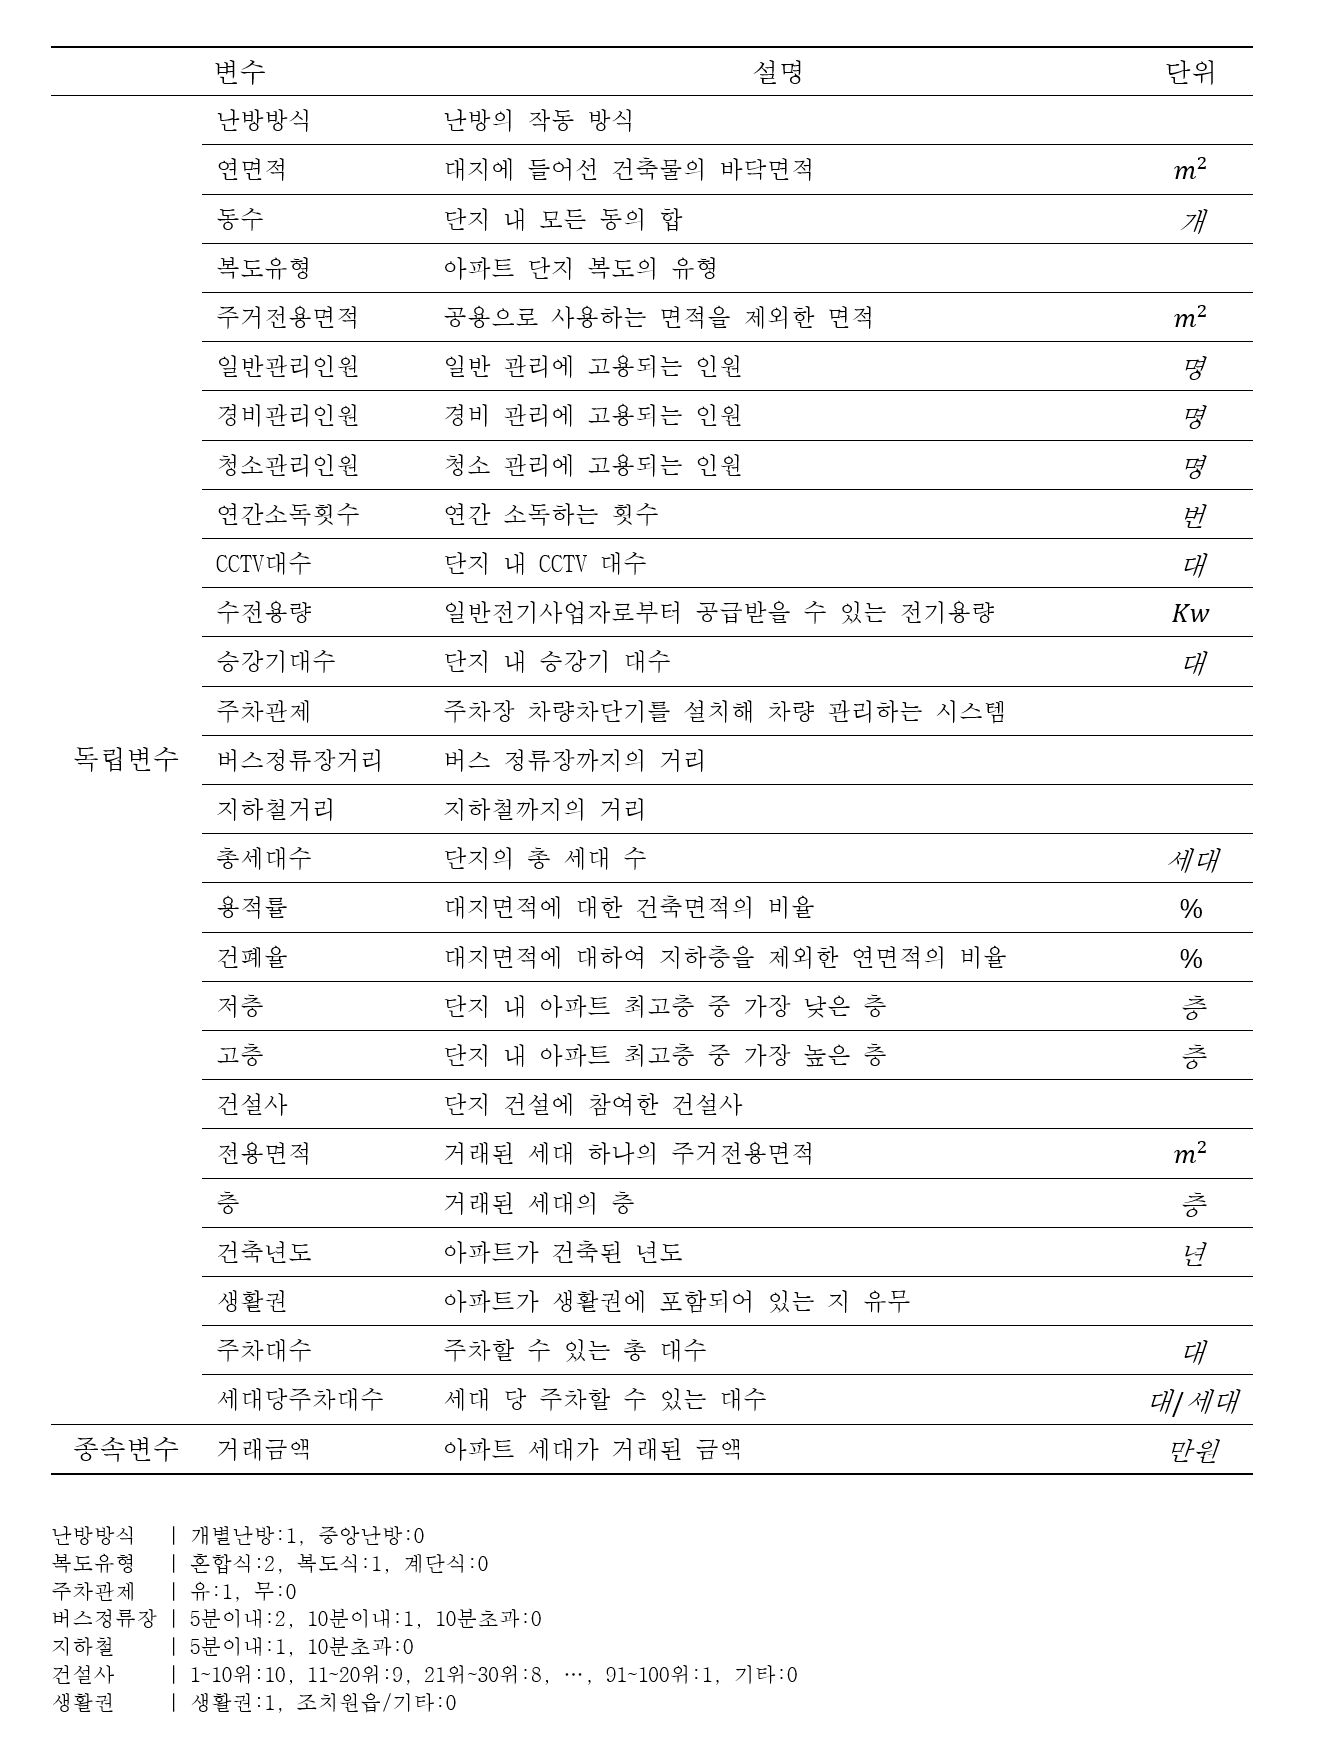


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/태블로공유폴더/작업/아파트단지정보/final_apt_info_data.csv')
#data=data.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)  무의미한 칼럼 제거

In [ ]:
#폰트 설정
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


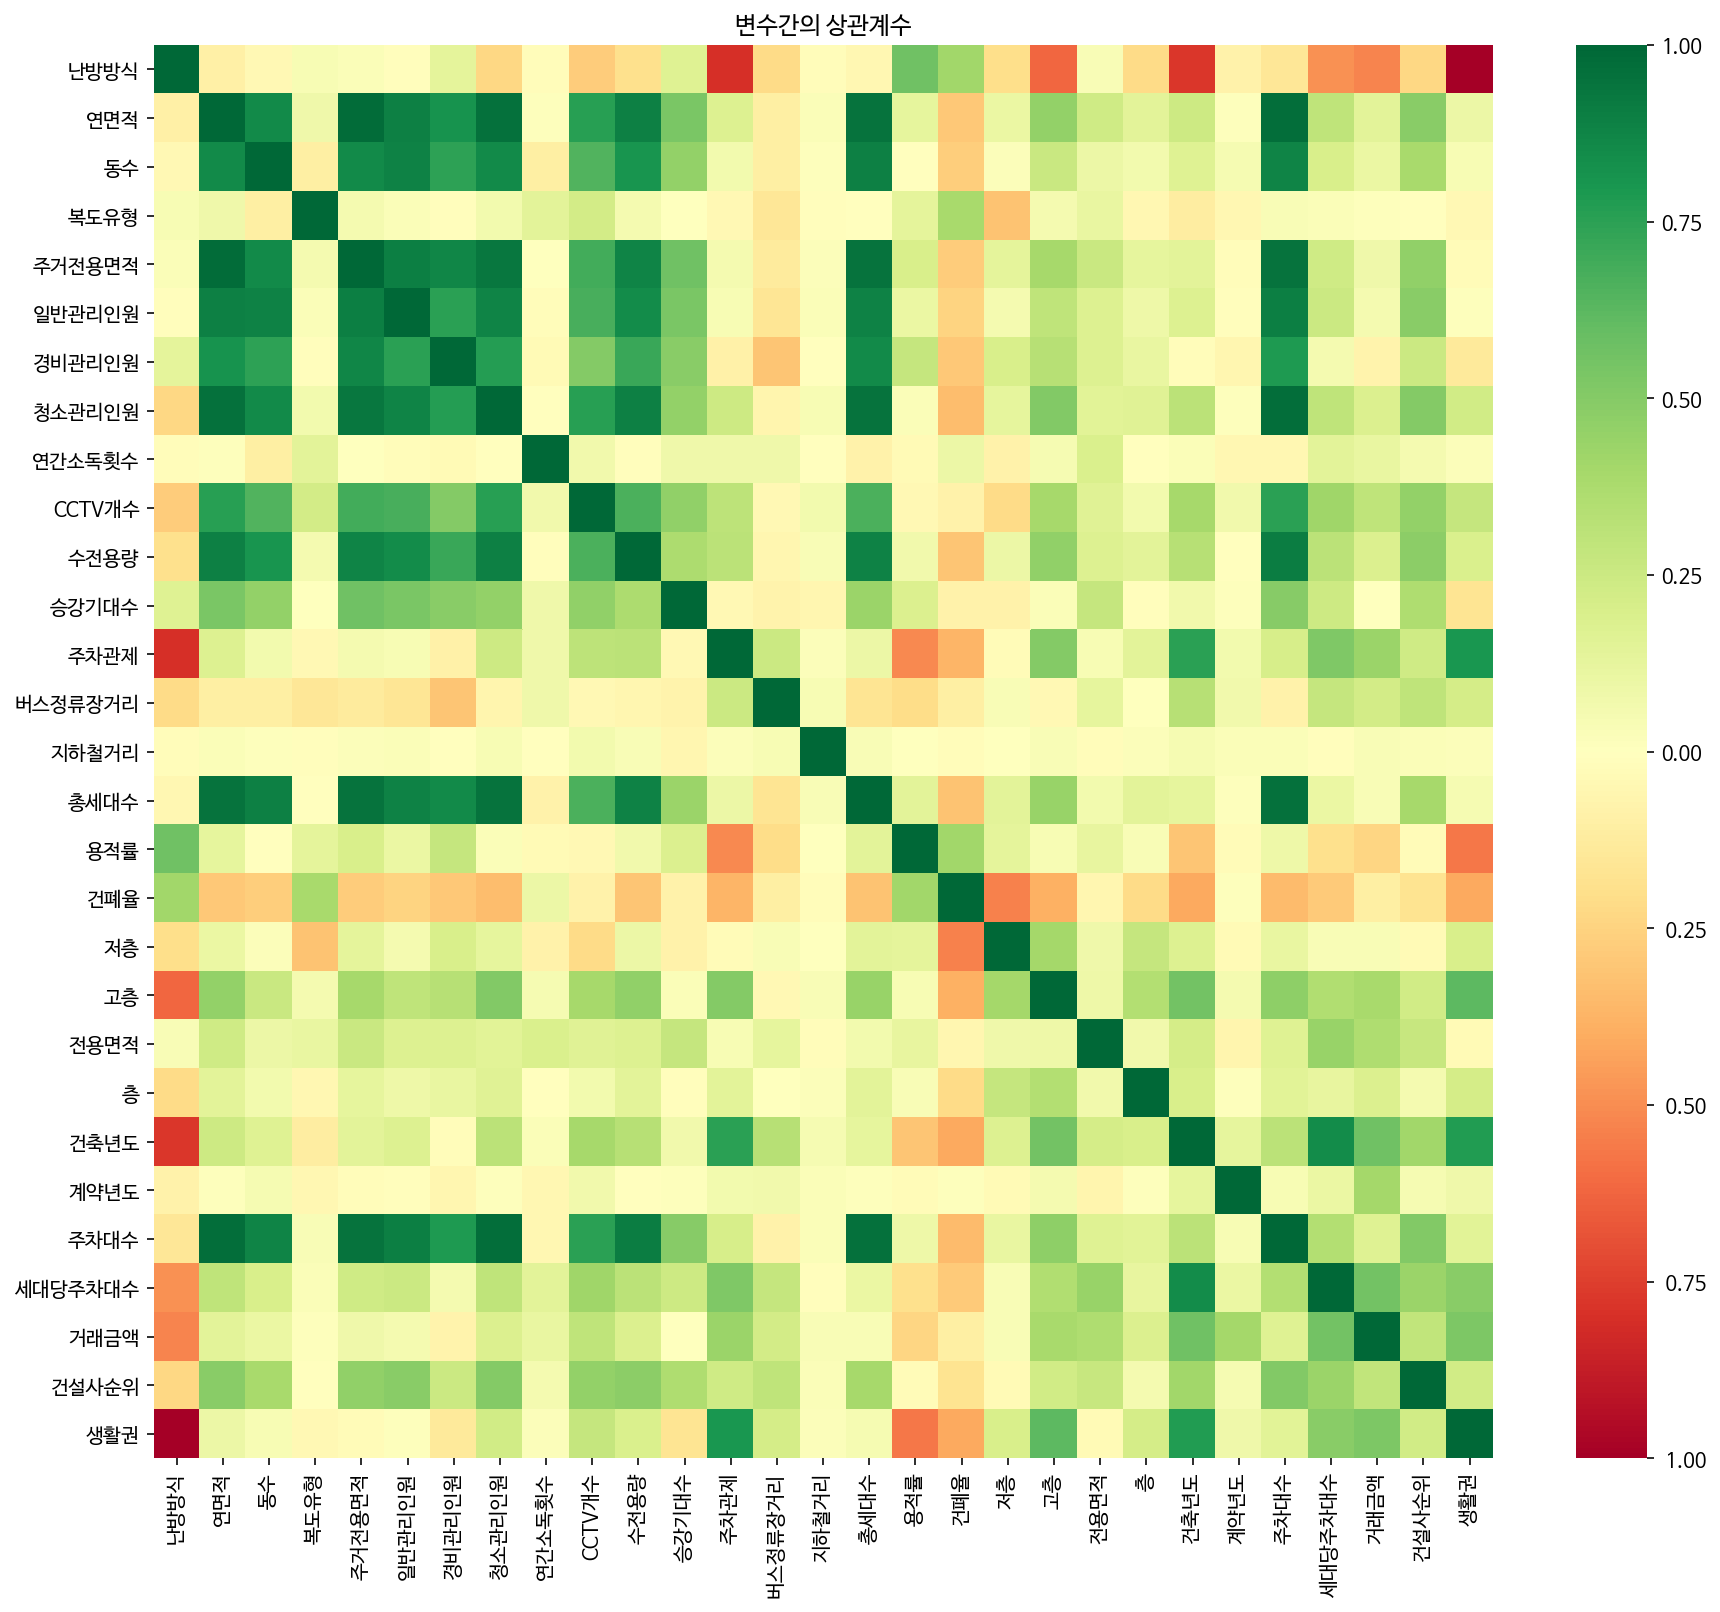

In [ ]:
data_corr=data.corr()
plt.figure(figsize=(15,13))
sns.heatmap(data_corr,cmap="RdYlGn")
plt.title('변수간의 상관계수')
plt.show()

## ⅳ) OLS 모델 학습

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/태블로공유폴더/작업/아파트단지정보/final_apt_info_data.csv', encoding='utf-8')
df.head(5)

,단지명,시군구,난방방식,연면적,동수,복도유형,주거전용면적,일반관리인원,경비관리인원,청소관리인원,연간소독횟수,CCTV개수,수전용량,승강기대수,주차관제,버스정류장거리,지하철거리,총세대수,용적률,건폐율,저층,고층,건설사,전용면적,층,건축년도,계약년도,주차대수,세대당주차대수,거래금액,건설사순위,생활권
0,수루배마을1단지,반곡동,0,206412.34,17,0,104167.151,9,6,17,3,650,4000.0,39,1,2,0,1111,181,20,9,29,"신동아건설,롯데건설",96.788,5,31,2019,1825,1.64,52000,5,1
1,수루배마을1단지,반곡동,0,206412.34,17,0,104167.151,9,6,17,3,650,4000.0,39,1,2,0,1111,181,20,9,29,"신동아건설,롯데건설",84.454,2,31,2019,1825,1.64,44325,5,1
2,수루배마을1단지,반곡동,0,206412.34,17,0,104167.151,9,6,17,3,650,4000.0,39,1,2,0,1111,181,20,9,29,"신동아건설,롯데건설",84.454,6,31,2019,1825,1.64,54800,5,1
3,수루배마을1단지,반곡동,0,206412.34,17,0,104167.151,9,6,17,3,650,4000.0,39,1,2,0,1111,181,20,9,29,"신동아건설,롯데건설",84.454,3,31,2019,1825,1.64,45568,5,1
4,수루배마을1단지,반곡동,0,206412.34,17,0,104167.151,9,6,17,3,650,4000.0,39,1,2,0,1111,181,20,9,29,"신동아건설,롯데건설",84.776,1,31,2019,1825,1.64,49239,5,1


In [ ]:
dfs = {}
years = []
for contractY, df_ in df.groupby('계약년도'):
    years.append(contractY)
    dfs[contractY] = df_

#### ⅰ) 선형모형

In [ ]:
y_X = "거래금액 ~ 난방방식 + 연면적 + 동수 + 복도유형 + 주거전용면적 + 일반관리인원 + 경비관리인원 + 청소관리인원 + 연간소독횟수 + CCTV개수 + 수전용량 + 승강기대수 + 주차관제 + 버스정류장거리 + 지하철거리 + 총세대수 + 용적률 + 건폐율 + 저층 + 고층 + 전용면적 + 층 + 건축년도 + 주차대수 + 세대당주차대수 + 건설사순위 + 생활권"

In [ ]:
# 선형 모형
sum = 0
for i in range(20):
    train, test = train_test_split(dfs[2020], test_size=0.2, shuffle=True, random_state=i)

    model_OLS = sm.OLS.from_formula(y_X, data=train)
    result_OLS = model_OLS.fit()
    sum += result_OLS.rsquared_adj
    print(result_OLS.rsquared_adj)

print("linear model adjusted rsquare :", sum/20)
rs_1 = sum/20

0.666547303315233
0.6711861821321143
0.6689004932608964
0.6677868839115924
0.6621790522529893
0.6627278990111092
0.668205516537683
0.6679339839755476
0.6715236014988762
0.6637568099982971
0.6627650105958816
0.6676996760022429
0.6691348408186893
0.6678451073800271
0.6643789091788264
0.6702745662956934
0.6686194898096711
0.6628632852711736
0.6670037945850625
0.6723249468999957
linear model adjusted rsquare : 0.6671828676365801


#### ⅱ) 준로그

In [ ]:
logy_X = "np.log(거래금액) ~ 난방방식 + 연면적 + 동수 + 복도유형 + 주거전용면적 + 일반관리인원 + 경비관리인원 + 청소관리인원 + 연간소독횟수 + CCTV개수 + 수전용량 + 승강기대수 + 주차관제 + 버스정류장거리 + 지하철거리 + 총세대수 + 용적률 + 건폐율 + 저층 + 고층 + 전용면적 + 층 + 건축년도 + 주차대수 + 세대당주차대수 + 건설사순위 + 생활권"

In [ ]:
# 준로그 모형
sum = 0
for i in range(20):
    train, test = train_test_split(dfs[2020], test_size=0.2, shuffle=True, random_state=i)

    log_model_OLS = sm.OLS.from_formula(logy_X, data=train)
    log_result_OLS = log_model_OLS.fit()
    sum += log_result_OLS.rsquared_adj
    print(log_result_OLS.rsquared_adj)

print("log model adjusted rsquare :", sum/20)
rs_2 = sum/20

0.8034496927746908
0.8078585741487405
0.8065682468130658
0.8038688081794175
0.7989179282268668
0.800947967975869
0.8044765873673434
0.8029086511862938
0.8060491970502368
0.80018044537864
0.8043719195645597
0.8048329704780962
0.8028209283745309
0.8068636380676362
0.8027717158592076
0.8050278598734523
0.8040317664618877
0.7993481587554289
0.8080550149896957
0.8081311262352576
log model adjusted rsquare : 0.8040740598880458


#### ⅲ) 역준로그

In [ ]:
y_logX = "거래금액 ~ 난방방식 + np.log(연면적) + np.log(동수) + 복도유형 + np.log(주거전용면적) + 일반관리인원 + 경비관리인원 + 청소관리인원 + 연간소독횟수 + np.log(CCTV개수) + 수전용량 + 승강기대수 + 주차관제 + 버스정류장거리 + 지하철거리 + np.log(총세대수) + np.log(용적률) + np.log(건폐율) + np.log(저층) + np.log(고층) + np.log(전용면적) + np.log(층) + np.log(건축년도) + np.log(주차대수) + np.log(세대당주차대수) + 건설사순위 + 생활권"

In [ ]:
#역준로그 모형

sum = 0
for i in range(20):
    train, test = train_test_split(dfs[2020], test_size=0.2, shuffle=True, random_state=i)

    inverse_log_model_OLS = sm.OLS.from_formula(y_logX, data=train)
    inverse_log_result_OLS = inverse_log_model_OLS.fit()
    sum += inverse_log_result_OLS.rsquared_adj
    print(inverse_log_result_OLS.rsquared_adj)

print("Inverse log model adjusted rsquare :", sum/20)
rs_3 = sum/20

0.6792128829520856
0.6841121810015907
0.6810109260202897
0.6805760455917915
0.6761992003578507
0.6756915946322328
0.6801498988990322
0.6801368242141315
0.6826890909058982
0.677520311153411
0.6760832421798215
0.6787479114876056
0.6824556735482434
0.6799674993242333
0.6779272163216791
0.6832726602425805
0.6804279782801771
0.6792807689839937
0.6790339048472931
0.6840799209236015
Inverse log model adjusted rsquare : 0.6799287865933772


#### ⅳ) 이중로그

In [ ]:
logy_logX = "np.log(거래금액) ~ 난방방식 + np.log(연면적) + np.log(동수) + 복도유형 + np.log(주거전용면적) + 일반관리인원 + 경비관리인원 + 청소관리인원 + 연간소독횟수 + np.log(CCTV개수) + 수전용량 + 승강기대수 + 주차관제 + 버스정류장거리 + 지하철거리 + np.log(총세대수) + np.log(용적률) + np.log(건폐율) + np.log(저층) + np.log(고층) + np.log(전용면적) + np.log(층) + np.log(건축년도) + np.log(주차대수) + np.log(세대당주차대수) + 건설사순위 + 생활권"

In [ ]:
#이중로그 모형

sum = 0
for i in range(20):
    train, test = train_test_split(dfs[2020], test_size=0.2, shuffle=True, random_state=i)

    multi_log_model_OLS = sm.OLS.from_formula(logy_logX, data=train)
    multi_log_result_OLS = multi_log_model_OLS.fit()
    sum += multi_log_result_OLS.rsquared_adj
    print(multi_log_result_OLS.rsquared_adj)

print("multi log model adjusted rsquare :", sum/20)
rs_4 = sum/20

0.8263771658106791
0.8301060851974612
0.8283724969567842
0.825574873378674
0.8217341032789726
0.820977077682547
0.8255936587455149
0.8251401767012315
0.8270002562550341
0.8226077753552521
0.825459550039057
0.8268299443535027
0.825209965641335
0.8287202197152731
0.8245391962570005
0.8262450484927655
0.8261759375810318
0.8211521639474735
0.8290981532879366
0.8305997637885467
multi log model adjusted rsquare : 0.8258756806233036


In [ ]:
print("Linear model adjusted rsquare :", rs_1)
print("Semi Log model adjusted rsquare :", rs_2)
print("Inverse semi log model adjusted rsquare :", rs_3)
print("Multi log model adjusted rsquare :", rs_4)

Linear model adjusted rsquare : 0.6671828676365801
Semi Log model adjusted rsquare : 0.8040740598880458
Inverse semi log model adjusted rsquare : 0.6799287865933772
Multi log model adjusted rsquare : 0.8258756806233036


**네 번째 이중로그 모형이 가장 높은 성능을 보였다.**

## ⅴ) OLS 모델 결과

In [ ]:

print(multi_log_result_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(거래금액)   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     1033.
Date:                Sun, 11 Apr 2021   Prob (F-statistic):               0.00
Time:                        11:01:58   Log-Likelihood:                -400.04
No. Observations:                5473   AIC:                             854.1
Df Residuals:                    5446   BIC:                             1032.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.4419      0.180     

In [ ]:
# 각 독립변수의 중요도를 비교하기 위해, 전체 모형과 각 변수 하나를 뺀 모형들의 성능 비교
# F , PR(>F) 확인 , F 가 높을수록 유의미한 데이터

sm.stats.anova_lm(multi_log_result_OLS, typ=2).sort_values(by = 'F',ascending = False)

,sum_sq,df,F,PR(>F)
생활권,125.410280,1.0,1841.501556,0.000000e+00
np.log(전용면적),88.214115,1.0,1295.319900,1.144654e-254
난방방식,57.585463,1.0,845.574385,6.122206e-173
np.log(건축년도),24.592702,1.0,361.114723,5.141209e-78
np.log(CCTV개수),23.958663,1.0,351.804623,4.109837e-76
수전용량,19.211060,1.0,282.091680,9.214016e-62
np.log(세대당주차대수),17.565523,1.0,257.928919,9.591121e-57
np.log(건폐율),17.029763,1.0,250.061911,4.172730e-55
np.log(고층),16.822012,1.0,247.011347,1.804923e-54
np.log(동수),15.936020,1.0,234.001597,9.400806e-52


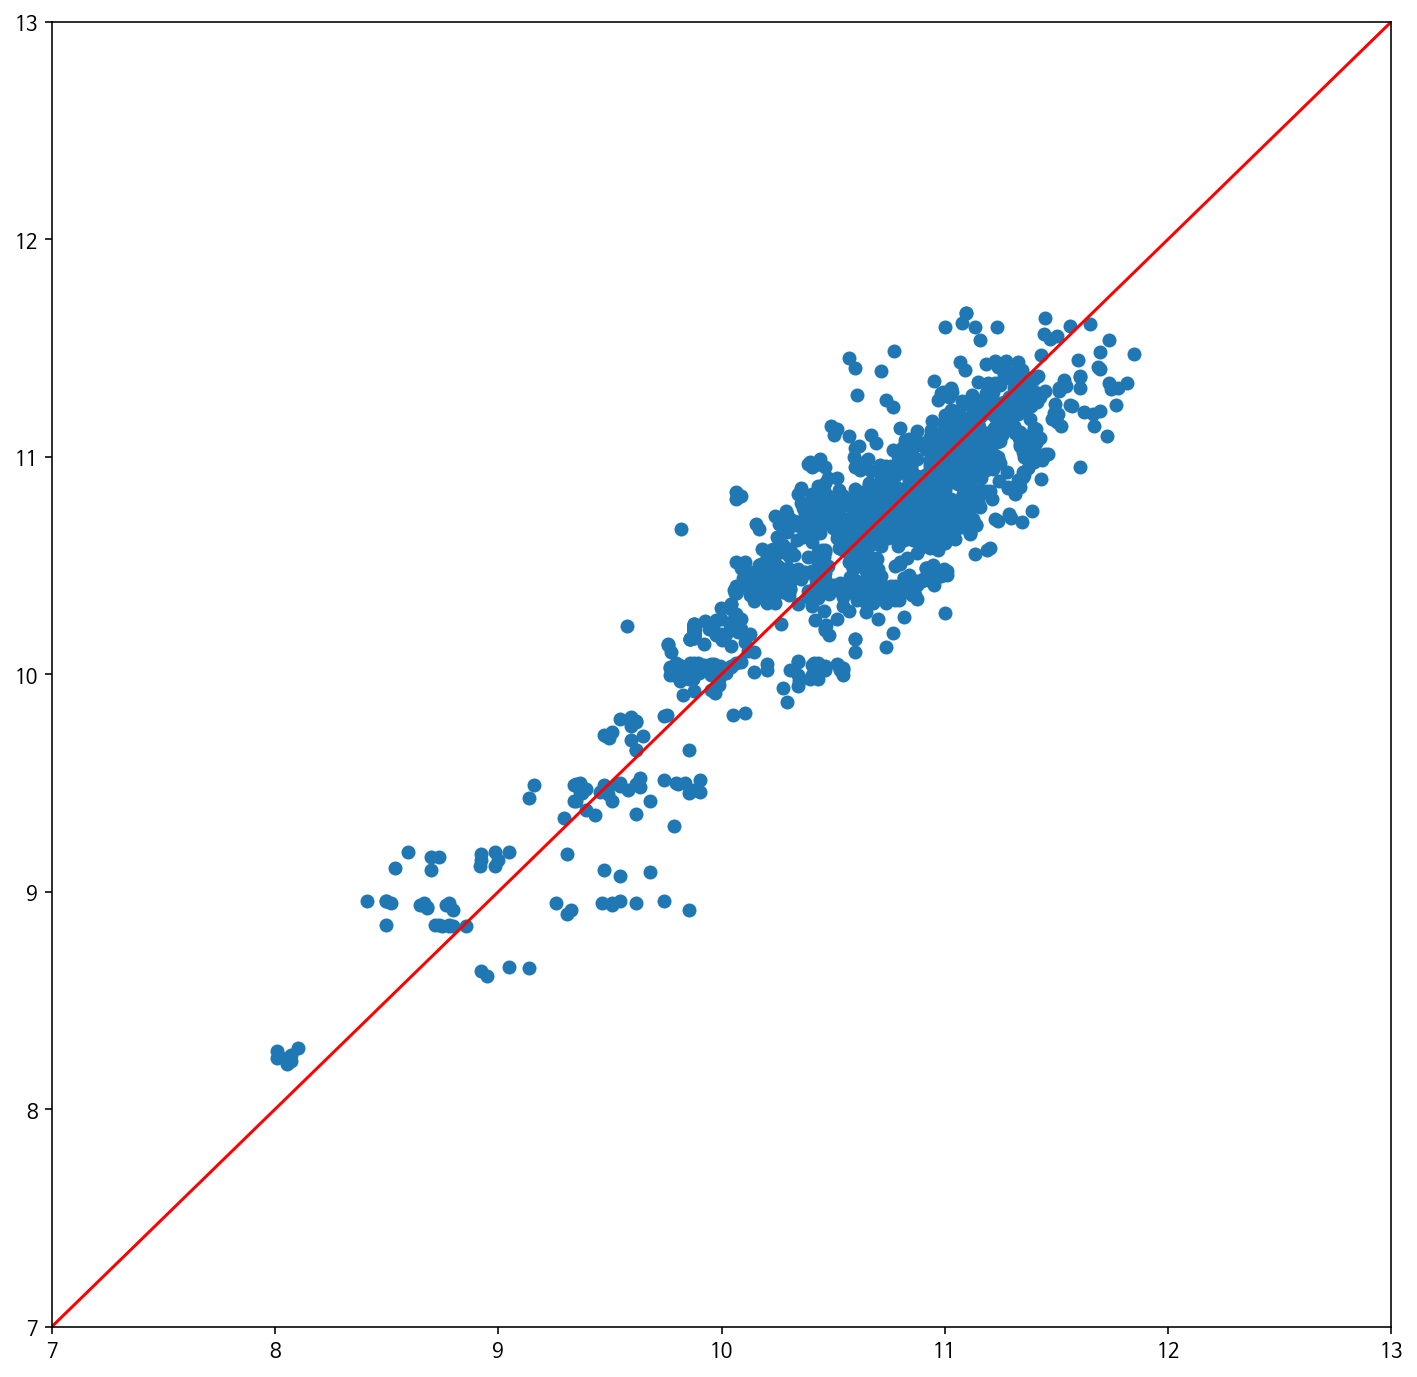

In [ ]:
#이중로그 모형을 이용하여 

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
plt.axis([7, 13, 7, 13])

plt.scatter(np.log(test["거래금액"]), multi_log_result_OLS.predict(test))
plt.plot([7,15],[7,15],'r')

모델 학습 결과 가장 무의미한 결과를 보인 '**주차대수**' 변수를 제거하고 모델 생성 

In [ ]:
sum_multi_log_result_OLS = 0
for i in range(10):
    train, test = train_test_split(dfs[2020], test_size=0.2, shuffle=True, random_state=i)

    multi_log_model_OLS = sm.OLS.from_formula(logy_logX, data=train)
    multi_log_result_OLS = multi_log_model_OLS.fit()
    sum_multi_log_result_OLS += multi_log_result_OLS.rsquared_adj

print(sum_multi_log_result_OLS/10)

0.8253483669362149


In [ ]:
sum_multi_log_result_OLS_exeptP = 0
for i in range(10):
    train, test = train_test_split(dfs[2020], test_size=0.2, shuffle=True, random_state=i)

    multi_log_model_OLS_exeptP = sm.OLS.from_formula(logy_logX.replace("+ np.log(주차대수) ", ""), data=train)
    multi_log_result_OLS_exeptP = multi_log_model_OLS_exeptP.fit()
    sum_multi_log_result_OLS_exeptP += multi_log_result_OLS_exeptP.rsquared_adj

print(sum_multi_log_result_OLS_exeptP/10)

0.8253724357068393


In [ ]:
print(multi_log_result_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(거래금액)   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     977.0
Date:                Sun, 11 Apr 2021   Prob (F-statistic):               0.00
Time:                        11:02:06   Log-Likelihood:                -462.21
No. Observations:                5473   AIC:                             978.4
Df Residuals:                    5446   BIC:                             1157.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.4690      0.182     

In [ ]:
print(multi_log_result_OLS_exeptP.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(거래금액)   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     1016.
Date:                Sun, 11 Apr 2021   Prob (F-statistic):               0.00
Time:                        11:02:07   Log-Likelihood:                -462.21
No. Observations:                5473   AIC:                             976.4
Df Residuals:                    5447   BIC:                             1148.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.4688      0.182     